# **Solución: Comparaando Modelos Clasificación**
Estudiante:

*   Edgar Yesid Monroy Ramos - 617242004

In [1]:
import pandas as pd

df = pd.read_csv('../DATA/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Get the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Get the numerical summary statistics of the dataset
df.describe().T



,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [4]:
# Get the categorical summary statistics of the dataset
df.describe(exclude = 'number').T

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [5]:
# Check for missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'ChurnTarget'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

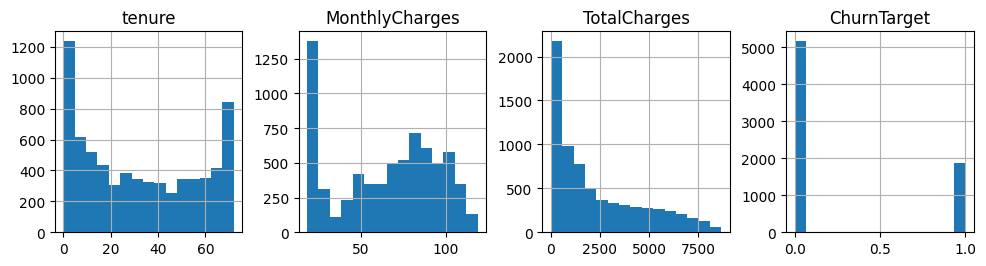

In [7]:
import numpy as np
import matplotlib.pyplot as plt

df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

df['SeniorCitizen'] = df['SeniorCitizen'].astype('str')

df['ChurnTarget'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

df['ChurnTarget'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

num_features = df.select_dtypes('number').columns
df[num_features].hist(bins=15, figsize=(15, 6), layout=(2, 5))

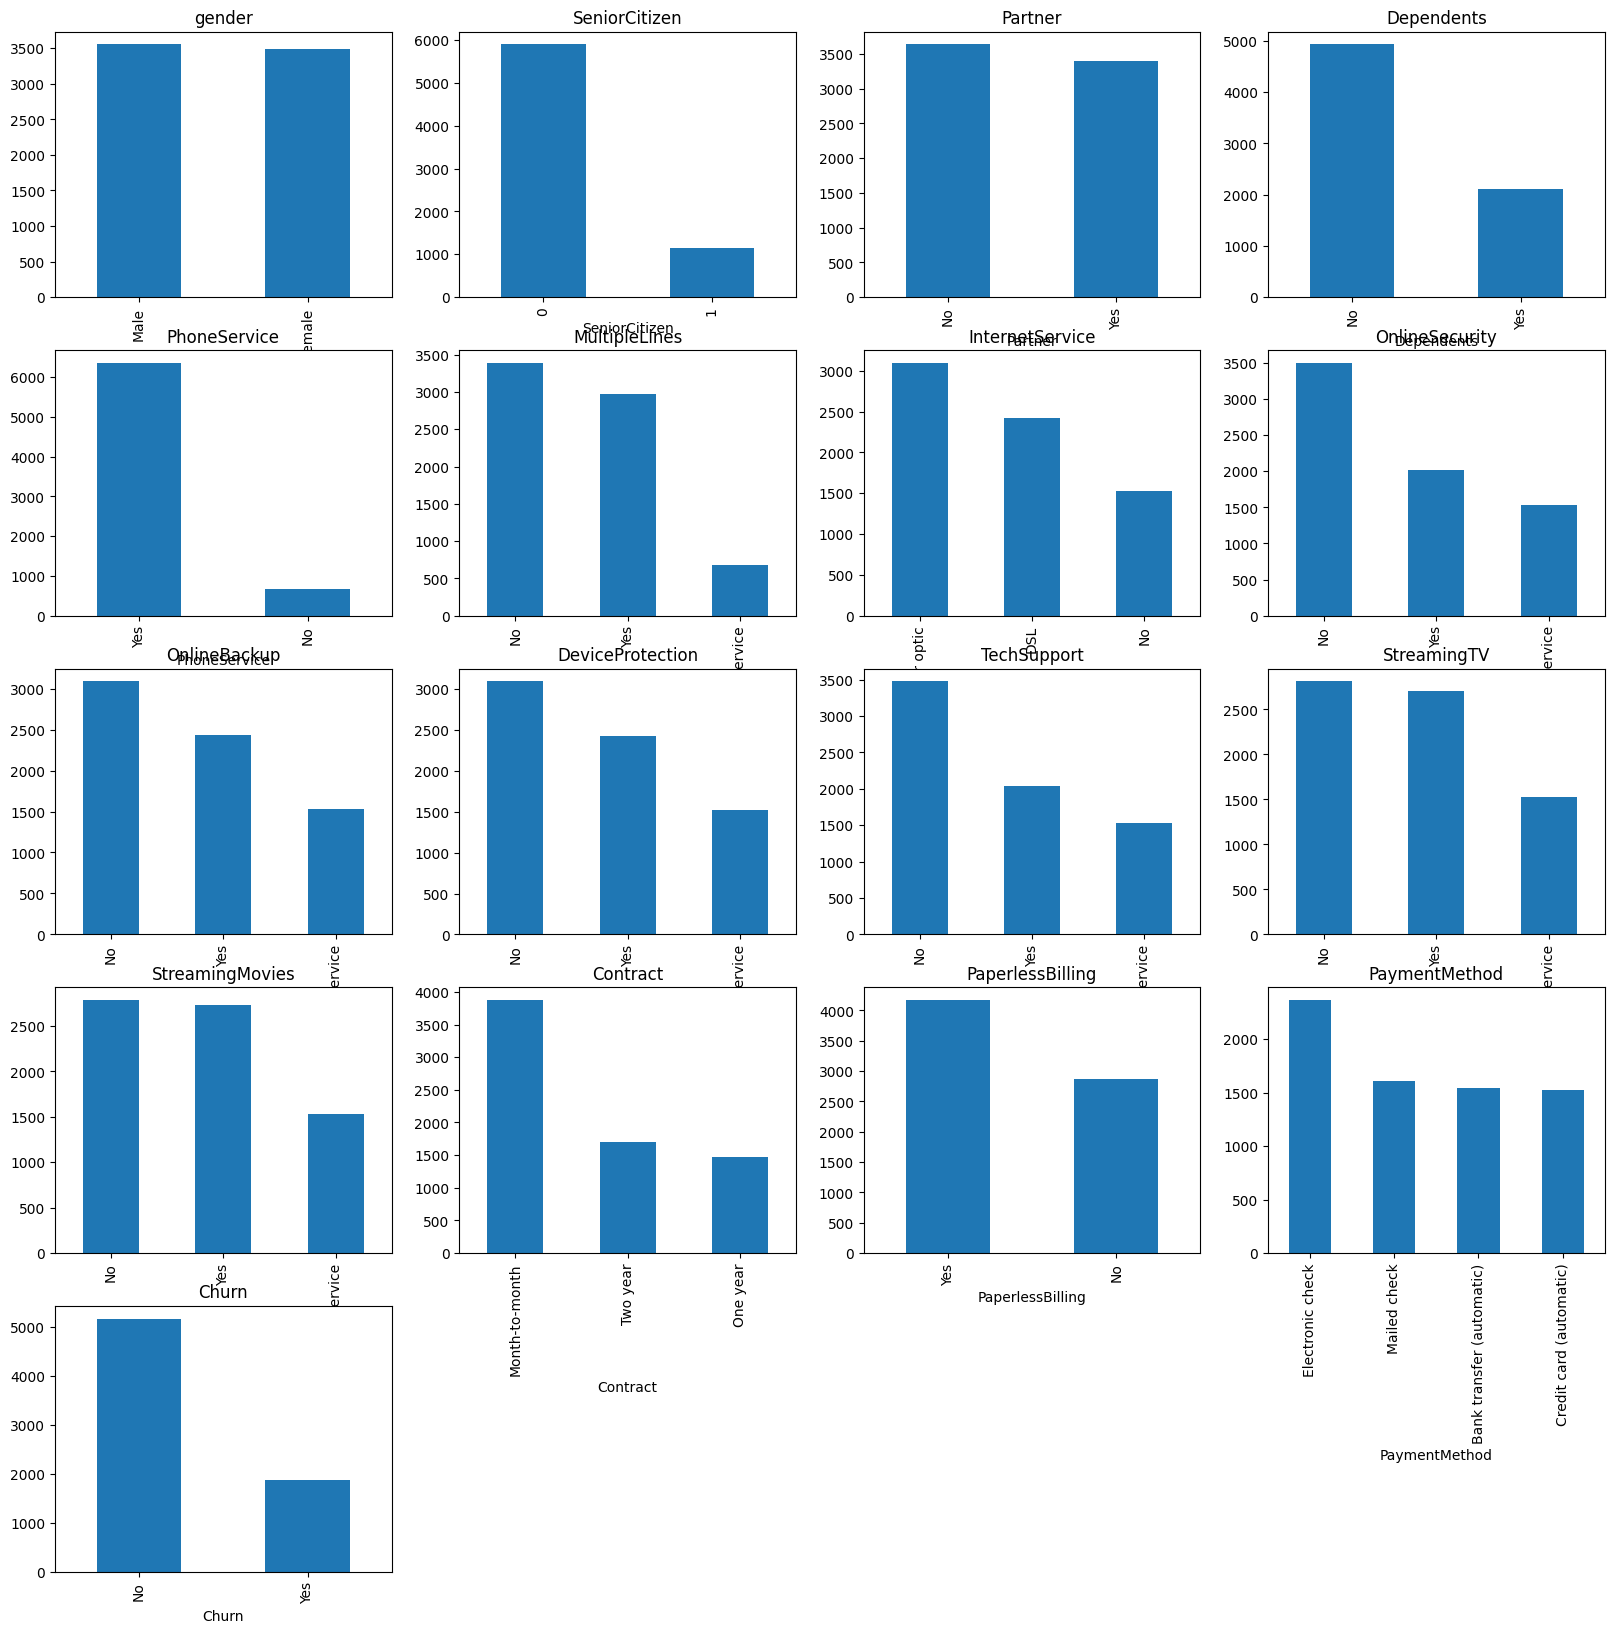

In [8]:
import matplotlib.pyplot as plt
# Plot distribution of categorical features
cat_features = df.drop('customerID', axis =1).select_dtypes(include='object').columns

plt.figure(figsize=(20, 20))
for i, col in enumerate(cat_features, 1):
    plt.subplot(5, 4, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)

Text(0.5, 1.0, 'Correlation Heatmap')

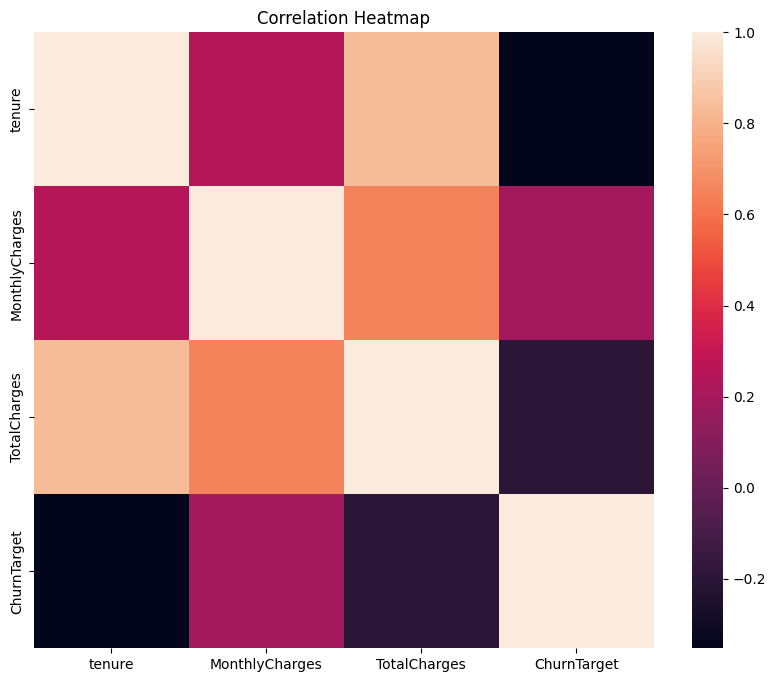

In [9]:
import seaborn as sns

# Plot correlations between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_features].corr())
plt.title('Correlation Heatmap')

c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\dython\__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution


<Axes: >

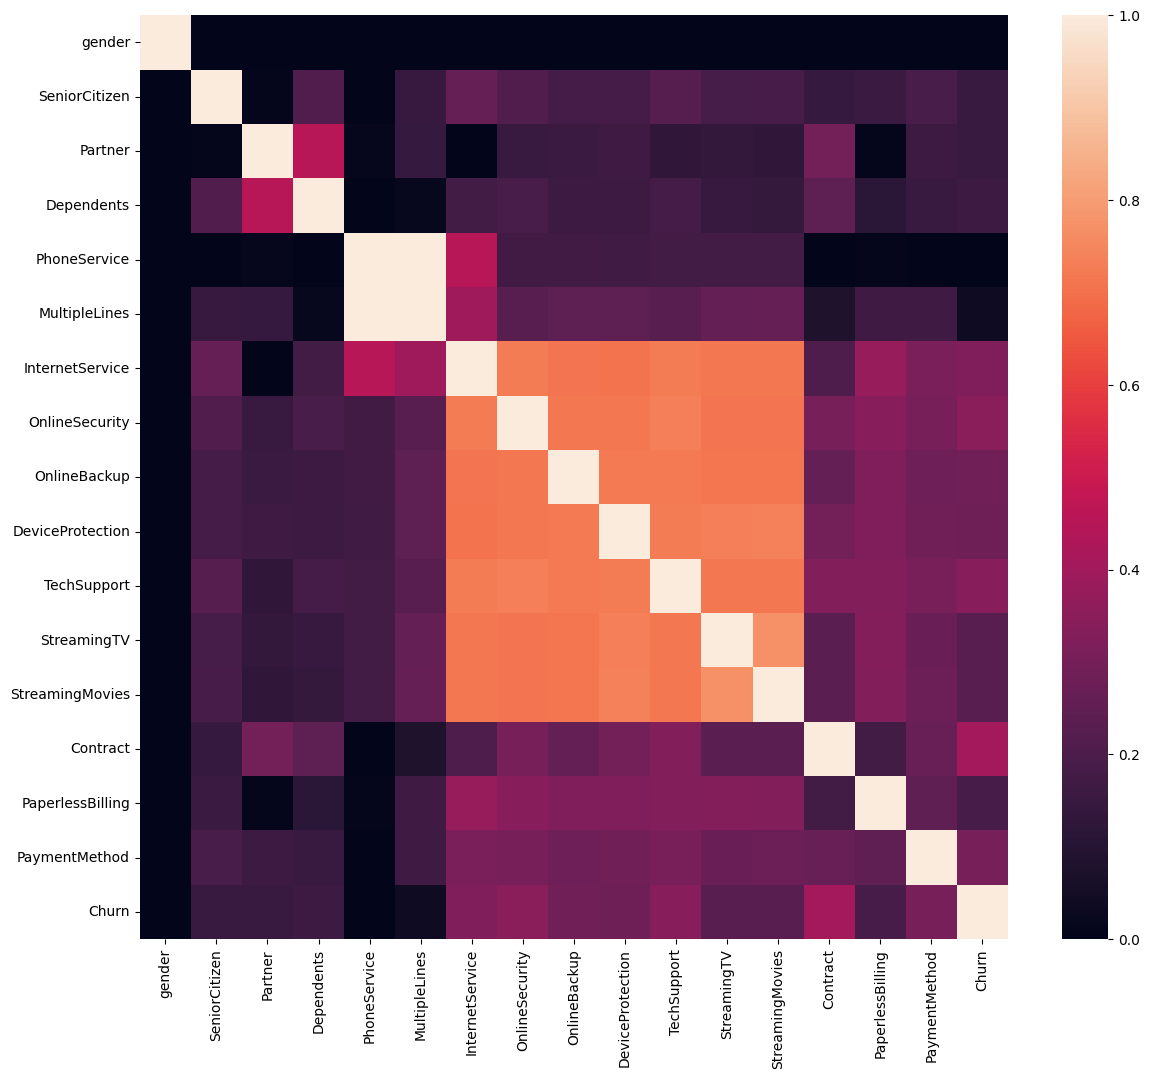

In [10]:
from dython.nominal import associations

# Calculate the Cramer’s V and correlation matrix
assoc = associations(df[cat_features], nominal_columns='all', plot=False)
corr_matrix = assoc['corr']

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix)

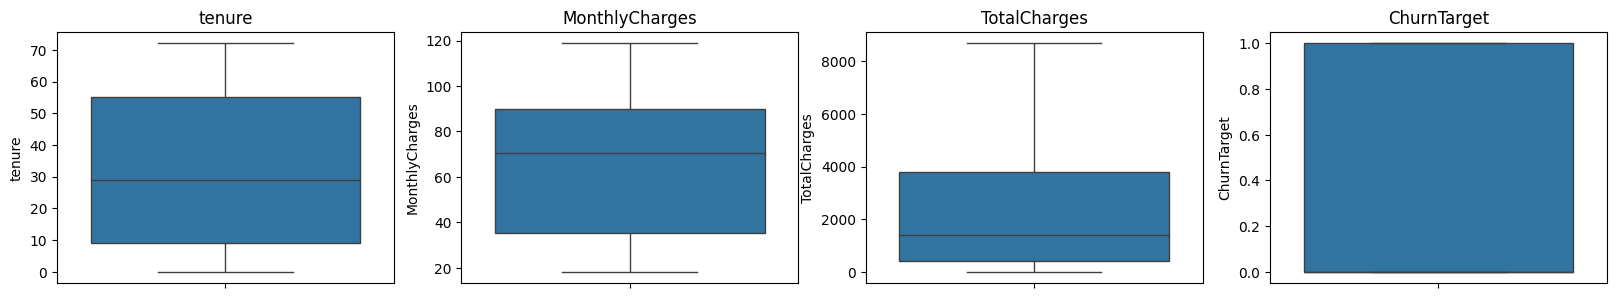

In [11]:
# Plot box plots to identify outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)

In [12]:
target = 'ChurnTarget'
num_features = df.select_dtypes(include=[np.number]).columns.drop(target)

# Calculate correlations
correlations = df[num_features].corrwith(df[target])

# Set a threshold for feature selection
threshold = 0.3
selected_num_features = correlations[abs(correlations) > threshold].index.tolist()

In [13]:
categorical_target = 'Churn'

assoc = associations(df[cat_features], nominal_columns='all', plot=False)
corr_matrix = assoc['corr']

threshold = 0.3
selected_cat_features = corr_matrix[corr_matrix.loc[categorical_target] > threshold ].index.tolist()

del selected_cat_features[-1]

In [14]:
selected_features = []
selected_features.extend(selected_num_features)
selected_features.extend(selected_cat_features)

print(selected_features)

['tenure', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod']


In [15]:
from sklearn.model_selection import train_test_split

target = 'ChurnTarget' 

X = df[selected_features]
y = df[target]

cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_features = X.select_dtypes(include=['number']).columns.tolist()

#Splitting data into Train, Validation, and Test Set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

## Regresión Logistica

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
# Prepare the preprocessing step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the logistic regression model
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [17]:
from sklearn.metrics import classification_report

# Evaluate on the validation set
y_val_pred = pipeline.predict(X_val)
print("Validation Logistic Regression Report:\n", classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = pipeline.predict(X_test)
print("Test Logistic Regression Report:\n", classification_report(y_test, y_test_pred))

Validation Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

Test Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)

# Pipeline con Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Entrenamiento
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [19]:
from sklearn.metrics import classification_report

# Evaluate on the validation set
y_val_pred = pipeline.predict(X_val)
print("Validation Random Forest Report:\n", classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = pipeline.predict(X_test)
print("Test Random Forest Report:\n", classification_report(y_test, y_test_pred))

Validation Random Forest Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1035
           1       0.51      0.50      0.50       374

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409

Test Random Forest Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1035
           1       0.52      0.52      0.52       374

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.75      0.75      0.75      1409



## GradientBoosting

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)

# Pipeline con Gradient Boosting
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Entrenamiento
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [21]:
from sklearn.metrics import classification_report

# Evaluate on the validation set
y_val_pred = pipeline.predict(X_val)
print("Validation Gradient Boosting Report:\n", classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = pipeline.predict(X_test)
print("Test Gradient Boosting Report:\n", classification_report(y_test, y_test_pred))

Validation Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

Test Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409




### Resumen de Resultados por Modelo

| Modelo              | Recall Validación | Recall Test | F1-score Validación | F1-score Test |
|---------------------|-------------------|-------------|----------------------|---------------|
| Random Forest       | 0.50              | 0.52        | 0.50                 | 0.52          |
| Regresión Logística | 0.54              | 0.54        | 0.59                 | 0.58          |
| Gradient Boosting   | 0.54              | 0.55        | 0.59                 | 0.59          |


### Comparativa General

* **Random Forest:** peor desempeño en recall y f1 para clase 1.
* **Logística:** mejora recall y f1, frente a Random Forest aunque es mejor  Gradient Boosting.
* **Gradient Boosting:** el más equilibrado, con recall y f1-score ligeramente mejores y mayor estabilidad.

---



c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [18:45:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [18:45:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [18:45:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [18:45:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encode

[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 896, number of negative: 2484
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265089 -> initscore=-1.019685
[LightGBM] [Info] Start training from score -1.019685
[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:Bo

c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Info] Number of positive: 896, number of negative: 2484
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265089 -> initscore=-1.019685
[LightGBM] [Info] Start training from score -1.019685
[LightGBM] [Info] Numb

c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in th

c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 896, number of negative: 2484
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265089 -> initscore=-1.019685
[LightGBM] [Info] Start training from score -1.019685
[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:Bo

c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Info] Number of positive: 896, number of negative: 2484
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265089 -> initscore=-1.019685
[LightGBM] [

c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 896, number of negative: 2484
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265089 -> initscore=-1.019685
[LightGBM] [Info] Start training from score -1.019685


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 896, number of negative: 2484
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265089 -> initscore=-1.019685
[LightGBM] [Info] Start training from score -1.019685


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Info] Numb

c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 896, number of negative: 2484
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265089 -> initscore=-1.019685
[LightGBM] [Info] Start training from score -1.019685
[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [

c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Info] Number of positive: 896, number of negative: 2484
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265089 -> initscore=-1.019685
[LightGBM] [

c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [

c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Info] Number of positive: 897, number of negative: 2483


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005734 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 896, number of negative: 2484
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265089 -> initscore=-1.019685
[LightGBM] [Info] Start training from score -1.019685
[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:Bo

c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 896, number of negative: 2484
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265089 -> initscore=-1.019685
[LightGBM] [Info] Start training from score -1.019685


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 896, number of negative: 2484
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265089 -> initscore=-1.019685
[LightGBM] [Info] Start training from score -1.019685


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 896, number of negative: 2484
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265089 -> initscore=-1.019685
[LightGBM] [Info] Start training from score -1.019685


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 896, number of negative: 2484
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265089 -> initscore=-1.019685
[LightGBM] [Info] Start training from score -1.019685


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 896, number of negative: 2484
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265089 -> initscore=-1.019685
[LightGBM] [Info] Start training from score -1.019685


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[

c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 896, number of negative: 2484
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265089 -> initscore=-1.019685
[LightGBM] [Info] Start training from score -1.019685


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.145218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 896, number of negative: 2484
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265089 -> initscore=-1.019685
[LightGBM] [Info] Start training from score -1.019685


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 896, number of negative: 2484
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265089 -> initscore=-1.019685
[LightGBM] [Info] Start training from score -1.019685


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 896, number of negative: 2484
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265089 -> initscore=-1.019685
[LightGBM] [Info] Start training from score -1.019685
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1121, number of negative: 3104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 4225, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265325 -> initscore=-1.018470
[LightGBM] [Info] Start training from score -1.018470


c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\edyem\mlops_2025_2\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


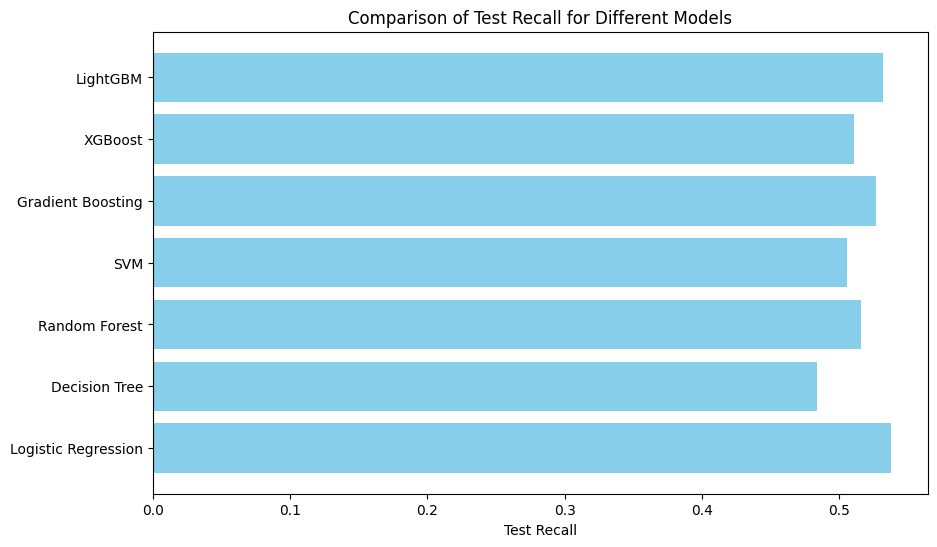

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

# Define the models and their parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__solver': ['lbfgs', 'liblinear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 10, 20]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__kernel': ['linear', 'rbf']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 6, 9]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__num_leaves': [31, 50, 100]
        }
    }
}

results = []

# Train and evaluate each model
for model_name, model_info in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model_info['model'])
    ])
    
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring='recall')
    grid_search.fit(X_train, y_train)
    
    # Best model from Grid Search
    best_model = grid_search.best_estimator_
    
    # Evaluate on the validation set
    y_val_pred = best_model.predict(X_val)
    val_recall = recall_score(y_val, y_val_pred, pos_label=1)
    
    # Evaluate on the test set
    y_test_pred = best_model.predict(X_test)
    test_recall = recall_score(y_test, y_test_pred, pos_label=1)
    
    # Save results
    results.append({
        'model': model_name,
        'best_params': grid_search.best_params_,
        'val_recall': val_recall,
        'test_recall': test_recall,
        'classification_report_val': classification_report(y_val, y_val_pred),
        'classification_report_test': classification_report(y_test, y_test_pred)
    })

# Plot the test recall scores
plt.figure(figsize=(10, 6))
model_names = [result['model'] for result in results]
test_recalls = [result['test_recall'] for result in results]
plt.barh(model_names, test_recalls, color='skyblue')
plt.xlabel('Test Recall')
plt.title('Comparison of Test Recall for Different Models')
plt.show()